In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:

sales_data = pd.read_csv('./datasets/sales_data.csv', encoding='ISO-8859-1')

FileNotFoundError: [Errno 2] No such file or directory: './datasets/sales_data.csv'

In [6]:
sales_data.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [7]:
# Check for missing values
print(sales_data.isnull().sum())

# Drop rows with missing values, except for the second address line as it is optional
columns_to_check = sales_data.columns.difference(['ADDRESSLINE2','TERRITORY'])
sales_data = sales_data.dropna(subset=columns_to_check)

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64


In [8]:
# convert columns to adequate datatypes
sales_data['ORDERDATE'] = pd.to_datetime(sales_data['ORDERDATE'], errors='coerce')
sales_data.dropna(subset=['ORDERDATE'], inplace=True)

In [9]:
# DEBUG: Check columns and their types
print(list(sales_data.columns))
print(sales_data.columns.to_series().groupby(sales_data.dtypes).groups)

['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE']
{int64: ['ORDERNUMBER', 'QUANTITYORDERED', 'ORDERLINENUMBER', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'MSRP'], float64: ['PRICEEACH', 'SALES'], datetime64[ns]: ['ORDERDATE'], object: ['STATUS', 'PRODUCTLINE', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE']}


In [10]:
# aggregate sales monthly sales data
monthly_sales = sales_data.groupby(['YEAR_ID', 'MONTH_ID']).agg({'SALES': 'sum', 'QUANTITYORDERED': 'sum'}).reset_index()
monthly_sales

,YEAR_ID,MONTH_ID,SALES,QUANTITYORDERED
0,2003,1,18997.30,231
1,2003,2,25783.76,229
2,2003,3,39797.38,355
3,2003,4,75175.07,735
4,2003,5,43585.80,514
5,2003,6,96090.45,857
6,2003,7,129709.60,1258
7,2003,8,164602.67,1664
8,2003,9,134524.60,1330
9,2003,10,104594.06,1032


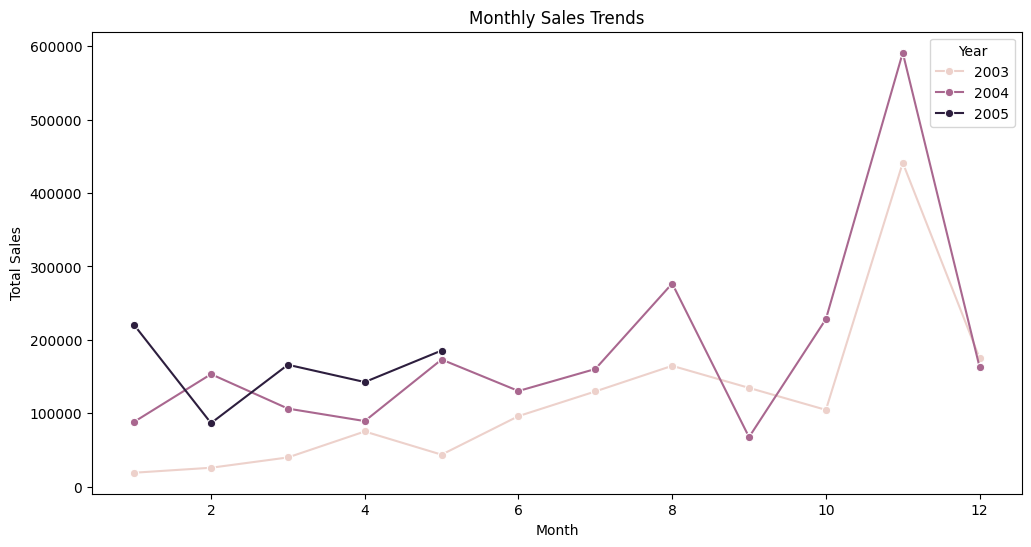

In [28]:
from matplotlib.ticker import FuncFormatter
# Define a formatter function to display full values
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.0f' % x

formatter = FuncFormatter(millions)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='MONTH_ID', y='SALES', hue='YEAR_ID', marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Year')

plt.gca().yaxis.set_major_formatter(formatter)

plt.show()
plt.savefig('plot.png')

plt.close()



In [12]:
product_sales = sales_data.groupby('PRODUCTCODE').agg({'SALES': 'sum'}).reset_index()

      ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER     SALES  \
598         10407               76      100.0                2  14082.80   
744         10322               50      100.0                6  12536.50   
44          10312               48      100.0                3  11623.70   
188         10127               46      100.0                2  11279.20   
1839        10339               55      100.0               13  10758.00   
2505        10388               46      100.0                2  10066.60   
90          10223               49      100.0                3   9774.03   
131         10400               64      100.0                9   9661.44   
175         10276               50      100.0                3   9631.00   
319         10142               46      100.0               11   9470.94   

      ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
598  2005-04-22  On Hold       2         4     2005  ...   
744  2004-11-04  Shipped       4        11 

/var/folders/pk/bh1mjlls115_230f582d_s5m0000gn/T/ipykernel_96030/3860360274.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




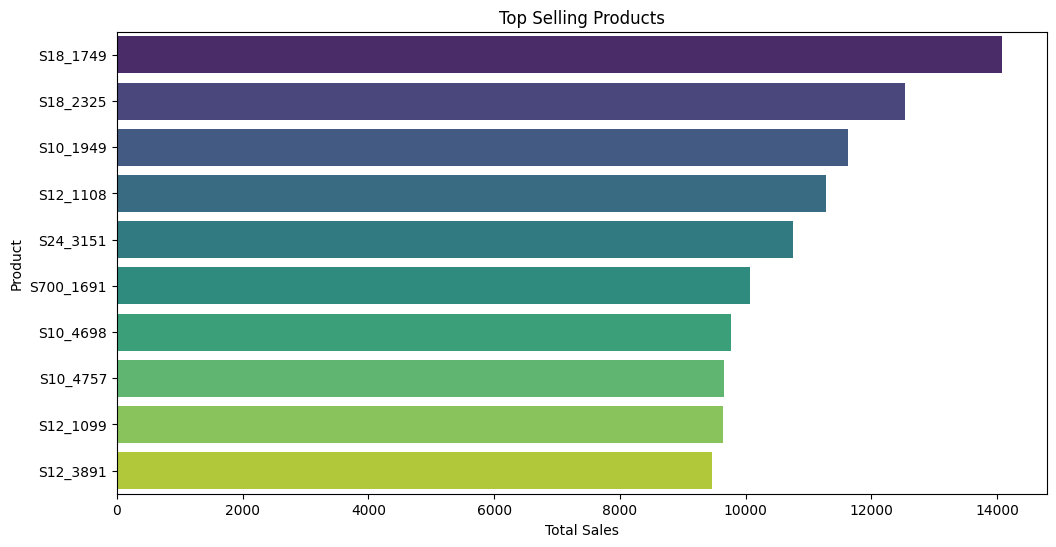

In [29]:
# Plot top-selling products
top_products = sales_data.sort_values(by='SALES', ascending=False).head(10)
print(top_products)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, x='SALES', y='PRODUCTCODE', palette='viridis')

plt.title('Top Selling Products')
plt.xlabel('Total Sales')
plt.ylabel('Product')

plt.show()

plt.savefig('plot1.png')

plt.close()


In [23]:
print(top_products_profit.columns)
print(top_products_profit.head())



Index(['YEAR_ID', 'MONTH_ID', 'SALES', 'QUANTITYORDERED'], dtype='object')
    YEAR_ID  MONTH_ID      SALES  QUANTITYORDERED
22     2004        11  591022.34             5821
10     2003        11  441122.02             4315
19     2004         8  276708.78             2698
21     2004        10  228221.80             2272
24     2005         1  220168.93             2117


/var/folders/pk/bh1mjlls115_230f582d_s5m0000gn/T/ipykernel_96030/2659258577.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




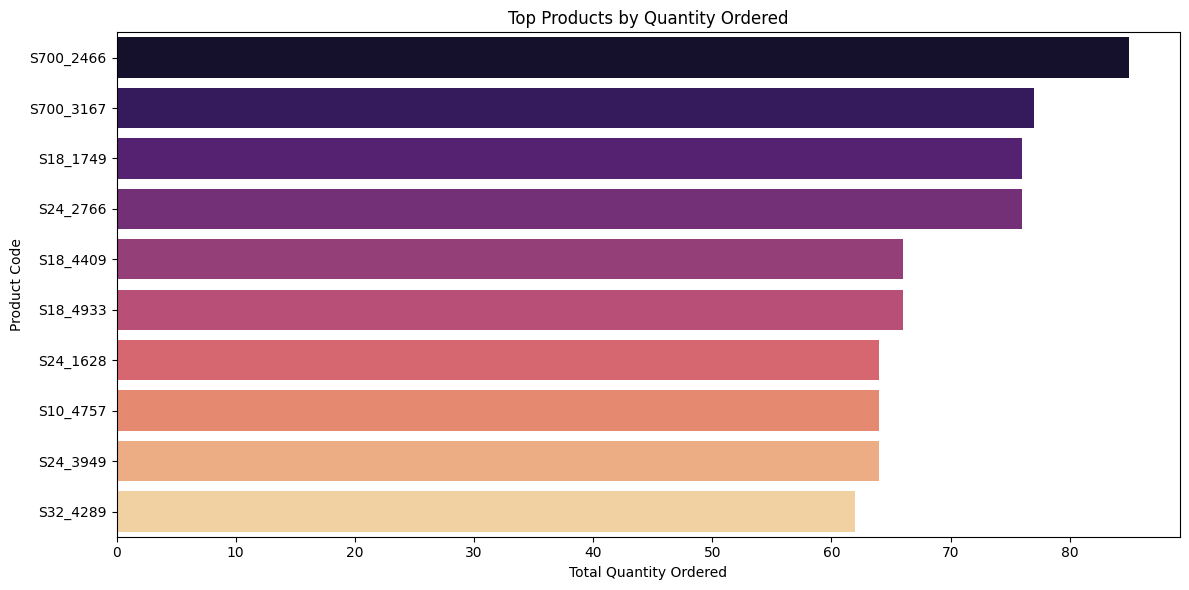

In [25]:
# Assuming 'QUANTITYORDERED' and 'PRODUCTCODE' are correct column names in top_products_profit DataFrame
top_products_quantity = sales_data.sort_values(by='QUANTITYORDERED', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_products_quantity, x='QUANTITYORDERED', y='PRODUCTCODE', palette='magma')

plt.title('Top Products by Quantity Ordered')
plt.xlabel('Total Quantity Ordered')
plt.ylabel('Product Code')

plt.tight_layout()
plt.savefig('plot2.png')
plt.show()
